# Proyek Analisis Data: E-Commerce Public Dataset

- Nama: Muhammad Faisal Rifaldi
- Email: frifaldi931@gmail.com
- Id Dicoding: faisal8701


Proyek analisis data ini adalah bagian dari tugas akhir dalam program pembelajaran "Belajar Analisis Data dengan Python" yang diselenggarakan oleh Dicoding. Dalam proyek ini, saya menggunakan dataset yang disediakan oleh Dicoding yang dikenal sebagai "E-Commerce Public Dataset." Dataset ini terdiri dari sembilan tabel yang berbeda, masing-masing mencakup informasi yang beragam. Tabel-tabel tersebut mencakup data tentang customers, sellers, orders, products, order reviews, order payments, order items, geolocation, dan product category name translation.

Proyek ini bertujuan untuk melakukan analisis data yang komprehensif menggunakan bahasa pemrograman Python. Dengan dataset yang luas dan beragam ini, proyek ini memungkinkan saya untuk menjelajahi berbagai aspek dalam domain e-commerce dan menggali wawasan yang berharga dari data tersebut.

- **customers_dataset** = customer_id,customer_unique_id, customer_zip_code_prefix, customer_city,customer_state
- **sellers_dataset** = seller_id, seller_zip_code_prefix, seller_city,seller_state
- **products_dataset** = product_id, product_category_name, product_name_lenght, product_description_lenght, product_photos_qty, product_weight_g, product_length_cm, product_height_cm, product_width_cm
- **orders_dataset** = order_id,customer_id, order_status,order_purchase_timestamp, order_approved_at, order_delivered_carrier_date,order_delivered_customer_date, order_estimated_delivery_date
- **order_reviews_dataset** = review_id, order_id, review_score, review_comment_title, review_comment_message, review_creation_date, review_answer_timestamp
- **order_payments_dataset** = order_id, payment_sequential, payment_type, payment_installments, payment_value
- **order_items_dataset** = order_id, order_item_id, product_id, seller_id, shipping_limit_date, price, freight_value
- **geolocation_dataset** = geolocation_zip_code_prefix, geolocation_lat, geolocation_lng, geolocation_city, geolocation_state
- **product_category_name_translation** = product_category_name, product_category_name_english

## Menentukan Pertanyaan Bisnis

- **Specific** : Bagaimana penjualan selama setahun terakhir dan produk apa yang paling sering dipesan oleh pelanggan dalam 6 bulan terakhir?
- **Measurable** : Berapa persentase pembayaran yang menggunakan metode pembayaran tertentu, dan apakah terdapat perubahan tren dalam penggunaan metode pembayaran selama periode waktu tertentu?
- **Action-oriented** : Mengidentifikasi daerah-daerah di mana terdapat peluang bisnis yang belum dimanfaatkan berdasarkan kota pelanggan dan penjual?
- **Relevant** : Apakah ada korelasi antara waktu pengiriman dan jumlah ulasan positif yang diterima?
- **Time-bound** : Apakah terdapat tren musiman dalam penjualan produk tertentu, dan jika ya, apa strategi yang dapat diimplementasikan untuk mengoptimalkan penjualan selama puncak musim tersebut?

## Menyiapkan semua library yang dibutuhkan

In [293]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [294]:
customers_df = pd.read_csv("D:\Python\Python_VSC\Submission\data\customers_dataset.csv")
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [295]:
sellers_df = pd.read_csv("D:\Python\Python_VSC\Submission\data\sellers_dataset.csv")
sellers_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [296]:
products_df = pd.read_csv("D:\Python\Python_VSC\Submission\data\products_dataset.csv")
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [297]:
orders_df = pd.read_csv("D:\Python\Python_VSC\Submission\data\orders_dataset.csv")
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [298]:
order_reviews_df = pd.read_csv("D:\Python\Python_VSC\Submission\data\order_reviews_dataset.csv")
order_reviews_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [299]:
order_payments_df = pd.read_csv("D:\Python\Python_VSC\Submission\data\order_payments_dataset.csv")
order_payments_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [300]:
order_items_df = pd.read_csv("D:\Python\Python_VSC\Submission\data\order_items_dataset.csv")
order_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [301]:
geolocation_df = pd.read_csv("D:\Python\Python_VSC\Submission\data\geolocation_dataset.csv")
geolocation_df.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [302]:
product_name_df = pd.read_csv("D:\Python\Python_VSC\Submission\data\product_category_name_translation.csv")
product_name_df.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


### Assessing Data

#### Menilai tabel `customers_df`

In [303]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [304]:
customers_df.isna().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [305]:
print("Jumlah duplikasi: ", customers_df.duplicated().sum())
customers_df.describe()

Jumlah duplikasi:  0


,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


#### Menilai tabel `sellers_df`

In [306]:
sellers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [307]:
sellers_df.isna().sum()

seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

In [308]:
print("Jumlah duplikasi: ", sellers_df.duplicated().sum())
sellers_df.describe()

Jumlah duplikasi:  0


,seller_zip_code_prefix
count,3095.000000
mean,32291.059451
std,32713.453830
min,1001.000000
25%,7093.500000
50%,14940.000000
75%,64552.500000
max,99730.000000


#### Menilai tabel `products_df` 

In [309]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [310]:
products_df.isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [311]:
print("Jumlah duplikasi: ", products_df.duplicated().sum())
products_df.describe()

Jumlah duplikasi:  0


,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


#### Menilai tabel `orders_df`

In [312]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [313]:
orders_df.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [314]:
print("Jumlah duplikasi: ", orders_df.duplicated().sum())
orders_df.describe()

Jumlah duplikasi:  0


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


#### Menilai tabel `order_reviews_df`

In [315]:
order_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [316]:
order_reviews_df.isna().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

In [317]:
print("Jumlah duplikasi: ", order_reviews_df.duplicated().sum())
order_reviews_df.describe()

Jumlah duplikasi:  0


,review_score
count,99224.000000
mean,4.086421
std,1.347579
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


#### Menilai tabel `order_payments_df`

In [318]:
order_payments_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [319]:
order_payments_df.isna().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

In [320]:
print("Jumlah duplikasi: ", order_payments_df.duplicated().sum())
order_payments_df.describe()

Jumlah duplikasi:  0


,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


#### Menilai tabel `order_items_df`

In [321]:
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [322]:
order_items_df.isna().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

In [323]:
print("Jumlah duplikasi: ", order_items_df.duplicated().sum())
order_items_df.describe()

Jumlah duplikasi:  0


,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


#### Menilai tabel `geolocation_df`

In [324]:
geolocation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


In [325]:
geolocation_df.isna().sum()

geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64

In [326]:
print("Jumlah duplikasi: ", geolocation_df.duplicated().sum())
geolocation_df.describe()

Jumlah duplikasi:  261831


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
count,1.000163e+06,1.000163e+06,1.000163e+06
mean,3.657417e+04,-2.117615e+01,-4.639054e+01
std,3.054934e+04,5.715866e+00,4.269748e+00
min,1.001000e+03,-3.660537e+01,-1.014668e+02
25%,1.107500e+04,-2.360355e+01,-4.857317e+01
50%,2.653000e+04,-2.291938e+01,-4.663788e+01
75%,6.350400e+04,-1.997962e+01,-4.376771e+01
max,9.999000e+04,4.506593e+01,1.211054e+02


#### Menilai tabel `product_name_df`

In [327]:
product_name_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


In [328]:
product_name_df.isna().sum()

product_category_name            0
product_category_name_english    0
dtype: int64

In [329]:
print("Jumlah duplikasi: ", product_name_df.duplicated().sum())
product_name_df.describe()

Jumlah duplikasi:  0


,product_category_name,product_category_name_english
count,71,71
unique,71,71
top,beleza_saude,health_beauty
freq,1,1


### Cleaning Data

#### Membersihkan tabel `products_df`

##### Missing values

In [330]:
products_df.isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [331]:
products_df[products_df.isna().any(axis=1)]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
105,a41e356c76fab66334f36de622ecbd3a,NaN,NaN,NaN,NaN,650.0,17.0,14.0,12.0
128,d8dee61c2034d6d075997acef1870e9b,NaN,NaN,NaN,NaN,300.0,16.0,7.0,20.0
145,56139431d72cd51f19eb9f7dae4d1617,NaN,NaN,NaN,NaN,200.0,20.0,20.0,20.0
154,46b48281eb6d663ced748f324108c733,NaN,NaN,NaN,NaN,18500.0,41.0,30.0,41.0
197,5fb61f482620cb672f5e586bb132eae9,NaN,NaN,NaN,NaN,300.0,35.0,7.0,12.0
...,...,...,...,...,...,...,...,...,...
32515,b0a0c5dd78e644373b199380612c350a,NaN,NaN,NaN,NaN,1800.0,30.0,20.0,70.0
32589,10dbe0fbaa2c505123c17fdc34a63c56,NaN,NaN,NaN,NaN,800.0,30.0,10.0,23.0
32616,bd2ada37b58ae94cc838b9c0569fecd8,NaN,NaN,NaN,NaN,200.0,21.0,8.0,16.0
32772,fa51e914046aab32764c41356b9d4ea4,NaN,NaN,NaN,NaN,1300.0,45.0,16.0,45.0


In [332]:
# Mengisi dengan Nilai Mean dan Mode
products_df['product_category_name'].fillna(products_df['product_category_name'].mode()[0], inplace=True)
products_df['product_weight_g'].fillna(products_df['product_weight_g'].mean(), inplace=True)
products_df['product_length_cm'].fillna(products_df['product_length_cm'].mean(), inplace=True)
products_df['product_height_cm'].fillna(products_df['product_height_cm'].mean(), inplace=True)
products_df['product_width_cm'].fillna(products_df['product_width_cm'].mean(), inplace=True)
products_df['product_name_lenght'].fillna(products_df['product_name_lenght'].mean(), inplace=True)
products_df['product_description_lenght'].fillna(products_df['product_description_lenght'].mean(), inplace=True)
products_df['product_photos_qty'].fillna(products_df['product_photos_qty'].mean(), inplace=True)


products_df.isna().sum()

product_id                    0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_length_cm             0
product_height_cm             0
product_width_cm              0
dtype: int64

#### Membersihkan tabel `orders_df`

##### Missing values

In [333]:
orders_df.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [334]:
orders_df[orders_df.isna()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
99436,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99437,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99438,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99439,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [335]:
# Isi nilai yang hilang dengan nilai terdekat
orders_df['order_approved_at'].ffill(inplace=True)
orders_df['order_delivered_carrier_date'].ffill(inplace=True)
orders_df['order_delivered_customer_date'].ffill(inplace=True)

orders_df.isna().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
dtype: int64

##### Memperbaiki tipe data

In [336]:
date_columns = ['order_purchase_timestamp', 
                'order_approved_at', 
                'order_delivered_carrier_date', 
                'order_delivered_customer_date', 
                'order_estimated_delivery_date']

for col in date_columns:
    # Menghapus fraksi detik dari nilai dalam kolom
    orders_df[col] = orders_df[col].str.split('.').str[0]
    # Mengonversi kolom menjadi datetime
    orders_df[col] = pd.to_datetime(orders_df[col], format='%Y-%m-%d %H:%M:%S', errors='coerce')

In [337]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99441 non-null  datetime64[ns]
 5   order_delivered_carrier_date   99441 non-null  datetime64[ns]
 6   order_delivered_customer_date  99441 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


#### Membersihkan tabel `order_reviews_df`

##### Memperbaiki tipe data

In [338]:
date_column = ['review_creation_date', 
                'review_answer_timestamp']

for col in date_column:
    order_reviews_df[col] = pd.to_datetime(order_reviews_df[col])

In [339]:
order_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   review_id                99224 non-null  object        
 1   order_id                 99224 non-null  object        
 2   review_score             99224 non-null  int64         
 3   review_comment_title     11568 non-null  object        
 4   review_comment_message   40977 non-null  object        
 5   review_creation_date     99224 non-null  datetime64[ns]
 6   review_answer_timestamp  99224 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 5.3+ MB


In [340]:
order_reviews_df.describe(include="all")

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
count,99224,99224,99224.000000,11568,40977,99224,99224
unique,98410,98673,NaN,4527,36159,NaN,NaN
top,7b606b0d57b078384f0b58eac1d41d78,c88b1d1b157a9999ce368f218a407141,NaN,Recomendo,Muito bom,NaN,NaN
freq,3,3,NaN,423,230,NaN,NaN
mean,NaN,NaN,4.086421,NaN,NaN,2018-01-12 20:49:23.948238336,2018-01-16 00:23:56.977938688
min,NaN,NaN,1.000000,NaN,NaN,2016-10-02 00:00:00,2016-10-07 18:32:28
25%,NaN,NaN,4.000000,NaN,NaN,2017-09-23 00:00:00,2017-09-27 01:53:27.249999872
50%,NaN,NaN,5.000000,NaN,NaN,2018-02-02 00:00:00,2018-02-04 22:41:47.500000
75%,NaN,NaN,5.000000,NaN,NaN,2018-05-16 00:00:00,2018-05-20 12:11:21.500000
max,NaN,NaN,5.000000,NaN,NaN,2018-08-31 00:00:00,2018-10-29 12:27:35


##### Missing values

In [341]:
order_reviews_df.isna().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

In [342]:
order_reviews_df[order_reviews_df['review_comment_title'].isna() 
                 & order_reviews_df['review_comment_message'].isna()]

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17,2018-02-18 14:36:24
5,15197aa66ff4d0650b5434f1b46cda19,b18dcdf73be66366873cd26c5724d1dc,1,NaN,NaN,2018-04-13,2018-04-16 00:39:37
6,07f9bee5d1b850860defd761afa7ff16,e48aa0d2dcec3a2e87348811bcfdf22b,5,NaN,NaN,2017-07-16,2017-07-18 19:30:34
...,...,...,...,...,...,...,...
99217,c6b270c61f67c9f7cb07d84ea8aeaf8b,48f7ee67313eda32bfcf5b9c1dd9522d,5,NaN,NaN,2017-12-13,2017-12-14 11:09:36
99218,af2dc0519de6e0720ef0c74292fb4114,d699c734a0b1c8111f2272a3f36d398c,5,NaN,NaN,2018-04-27,2018-04-30 01:18:57
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,NaN,NaN,2018-07-07,2018-07-14 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09,2017-12-11 20:06:42


In [343]:
# Mengisi data yang kosong pada dengan value "No Title" dan "No Comment"
order_reviews_df['review_comment_title'].fillna('No Title', inplace=True)
order_reviews_df['review_comment_message'].fillna('No Comment', inplace=True)

order_reviews_df.isna().sum()

review_id                  0
order_id                   0
review_score               0
review_comment_title       0
review_comment_message     0
review_creation_date       0
review_answer_timestamp    0
dtype: int64

#### Membersihkan tabel `order_items_df`

##### Memperbaiki tipe data

In [344]:
datetime_columns = ["shipping_limit_date"]

for column in datetime_columns:
    order_items_df[column] = pd.to_datetime(order_items_df[column])

In [345]:
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


#### Membersihkan tabel `geolocation_df`

##### Duplicate data

In [346]:
geolocation_df[geolocation_df.duplicated()]

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
15,1046,-23.546081,-46.644820,sao paulo,SP
44,1046,-23.546081,-46.644820,sao paulo,SP
65,1046,-23.546081,-46.644820,sao paulo,SP
66,1009,-23.546935,-46.636588,sao paulo,SP
67,1046,-23.546081,-46.644820,sao paulo,SP
...,...,...,...,...,...
1000153,99970,-28.343273,-51.873734,ciriaco,RS
1000154,99950,-28.070493,-52.011342,tapejara,RS
1000159,99900,-27.877125,-52.224882,getulio vargas,RS
1000160,99950,-28.071855,-52.014716,tapejara,RS


In [347]:
geolocation_df.drop_duplicates(inplace=True)

In [348]:
geolocation_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 738332 entries, 0 to 1000161
Data columns (total 5 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   geolocation_zip_code_prefix  738332 non-null  int64  
 1   geolocation_lat              738332 non-null  float64
 2   geolocation_lng              738332 non-null  float64
 3   geolocation_city             738332 non-null  object 
 4   geolocation_state            738332 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 33.8+ MB


In [349]:
print("Jumlah duplikasi: ", geolocation_df.duplicated().sum())

Jumlah duplikasi:  0


## Exploratory Data Analysis (EDA)

### Explore `customers_df`

In [350]:
customers_df.sample(5)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
17405,4791855f611bfc7e8c06bd690a64ca10,1ca845c3b11ba93c4ac5182ab9c1197e,81670,curitiba,PR
73933,a99315708cc05b41436c913e956c76e9,d59cfb2d24c1e3d9fa9baa63871d5e86,97502,uruguaiana,RS
20374,4f53f38de92e32faba788f35878dd4eb,95c0772e8709029440f23baecd889e87,2712,sao paulo,SP
94400,fa087843ff42cf337317d1f3f62fb18b,34934e77f99973267ba7e7f1ee3654a0,5612,sao paulo,SP
42318,b33f0975ea69aae6fac18326ac5bfb0b,abbc8cf2f41e400436f55ee76de5ffff,7152,guarulhos,SP


In [351]:
customers_df.describe(include="all")

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441.000000,99441,99441
unique,99441,96096,NaN,4119,27
top,06b8999e2fba1a1fbc88172c00ba8bc7,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP
freq,1,17,NaN,15540,41746
mean,NaN,NaN,35137.474583,NaN,NaN
std,NaN,NaN,29797.938996,NaN,NaN
min,NaN,NaN,1003.000000,NaN,NaN
25%,NaN,NaN,11347.000000,NaN,NaN
50%,NaN,NaN,24416.000000,NaN,NaN
75%,NaN,NaN,58900.000000,NaN,NaN


In [352]:
customers_df.customer_id.is_unique

True

In [353]:
# Mengetahui Kota customer yang terbanyak
customers_df.groupby(by="customer_city").customer_id.nunique().sort_values(ascending=False)

customer_city
sao paulo         15540
rio de janeiro     6882
belo horizonte     2773
brasilia           2131
curitiba           1521
                  ...  
ibiara                1
rio espera            1
rio dos indios        1
rio dos cedros        1
lagoao                1
Name: customer_id, Length: 4119, dtype: int64

In [354]:
# Mengetahui negara customer yang terbanyak
customers_df.groupby(by="customer_state").customer_id.nunique().sort_values(ascending=False)

customer_state
SP    41746
RJ    12852
MG    11635
RS     5466
PR     5045
SC     3637
BA     3380
DF     2140
ES     2033
GO     2020
PE     1652
CE     1336
PA      975
MT      907
MA      747
MS      715
PB      536
PI      495
RN      485
AL      413
SE      350
TO      280
RO      253
AM      148
AC       81
AP       68
RR       46
Name: customer_id, dtype: int64

### Explore `orders_df`

In [355]:
orders_df.sample(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
83932,9e2d5a5568e945a766c01200f5f3cdc8,ec797945bf13ab061fb9cdd8aec60b34,delivered,2017-03-21 11:03:03,2017-03-21 11:03:03,2017-03-21 12:05:44,2017-03-28 12:47:50,2017-04-07
46297,8fa060cb54d9cfaa1b5cd7db41b0195e,d7a47aea87566367c4ba92514666bad0,delivered,2017-12-16 17:23:00,2017-12-16 17:33:44,2017-12-18 22:42:22,2017-12-26 16:19:05,2018-01-17
49040,098f15b40cb74aae030d56b720c5698c,9662a6e2918ac93d63f687e51219d027,delivered,2018-01-26 17:26:30,2018-01-26 17:39:47,2018-01-30 23:32:50,2018-02-09 15:39:59,2018-02-19
86961,c228d74a177133cf18cf69486c3fcd10,5ba3002b920d588cc7e1e1a796713e0b,delivered,2018-04-05 22:31:47,2018-04-05 22:49:06,2018-04-07 01:21:25,2018-04-24 15:23:02,2018-05-03
27919,691c30273e86d88ab9be2ac45e25d516,ae8652a7f987b32a0161f4c72b22ffbc,delivered,2018-08-08 10:47:10,2018-08-09 08:50:25,2018-08-09 15:08:00,2018-08-14 15:18:58,2018-08-20


In [356]:
# Mengetahui jumlah jenis status pesanan
order_status_counts = orders_df['order_status'].value_counts()
print(order_status_counts)

order_status
delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: count, dtype: int64


In [357]:
# Menghitung estimasi waktu pengiriman
delivery_time = orders_df["order_delivered_customer_date"] - orders_df["order_purchase_timestamp"]
delivery_time = delivery_time.apply(lambda x: x.total_seconds())
orders_df["delivery_time"] = round(delivery_time / 86400)

# Mengubah nilai-nilai selain "delivered" menjadi 0
orders_df.loc[orders_df["order_status"] != "delivered", "delivery_time"] = 0

In [358]:
# Mengelompokan waktu pengiriman
def categorize_delivery_time(delivery_time):
    if delivery_time <= 7 and delivery_time > 0:
        return "Fast"
    elif delivery_time <= 0:
        return "Onprocess"
    elif delivery_time <= 14:
        return "Medium"
    else:
        return "Slow"
    
orders_df["delivery_category"] = orders_df["delivery_time"].apply(categorize_delivery_time)

In [359]:
orders_df.sample(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time,delivery_category
13159,3ed26cafd58917f71e9044701fe9e7cb,6238908ec39a972e1bb80c6fadec03fe,delivered,2017-08-31 18:54:14,2017-08-31 19:05:38,2017-09-01 15:14:34,2017-09-05 11:13:30,2017-09-19,5.0,Fast
96040,cb203b92888d8aa67beda73ce18054dd,8845218b841a1c684b790c3615583a6f,delivered,2017-10-30 22:02:57,2017-10-30 23:31:08,2017-10-31 19:43:04,2017-11-14 18:12:57,2017-11-24,15.0,Slow
39437,7c77dfe4ee780d97bc7247d7aa809ab8,67011afc862e48b537aec0a02f7afe3f,delivered,2018-07-31 22:01:48,2018-07-31 22:40:24,2018-08-01 13:51:00,2018-08-06 17:08:40,2018-08-13,6.0,Fast
34026,e1bcc5095d07604629d0bce9477d77a9,b9ed68da40fa3b4f5df462ef5b3438a6,delivered,2018-03-27 10:24:28,2018-03-27 10:35:27,2018-03-28 22:34:32,2018-04-02 13:36:43,2018-04-12,6.0,Fast
22833,a7b99e52e5bf8862a3727ddafe014d03,0f3634092b8645824b6a6cf3468a163a,delivered,2017-11-24 01:29:43,2017-11-24 01:37:35,2017-11-29 18:22:10,2017-12-04 19:16:58,2017-12-14,11.0,Medium


### Expoler `sellers_df`

In [360]:
sellers_df.sample(5)

,seller_id,seller_zip_code_prefix,seller_city,seller_state
1878,4b90495391ac0bd181a80a459df1e718,96400,bage,RS
2116,aa2640d851ec322526f1295bbeb20092,1156,sao paulo,SP
1269,6f835fd4be26989b1b064399da346143,81280,curitiba,PR
2067,c8143b3069f6746a77421b5ce30a450c,75345,abadia de goias,GO
2474,81ed90f07c0bacb7594940ba2ef676aa,35500,divinopolis,MG


In [361]:
sellers_df.describe(include="all")

,seller_id,seller_zip_code_prefix,seller_city,seller_state
count,3095,3095.000000,3095,3095
unique,3095,NaN,611,23
top,3442f8959a84dea7ee197c632cb2df15,NaN,sao paulo,SP
freq,1,NaN,694,1849
mean,NaN,32291.059451,NaN,NaN
std,NaN,32713.453830,NaN,NaN
min,NaN,1001.000000,NaN,NaN
25%,NaN,7093.500000,NaN,NaN
50%,NaN,14940.000000,NaN,NaN
75%,NaN,64552.500000,NaN,NaN


In [362]:
sellers_df.groupby(by="seller_city")["seller_id"].nunique().sort_values(ascending=False)

seller_city
sao paulo         694
curitiba          127
rio de janeiro     96
belo horizonte     68
ribeirao preto     52
                 ... 
ivoti               1
itirapina           1
itau de minas       1
itapui              1
xaxim               1
Name: seller_id, Length: 611, dtype: int64

In [363]:
sellers_df.groupby(by="seller_state")["seller_id"].nunique().sort_values(ascending=False)

seller_state
SP    1849
PR     349
MG     244
SC     190
RJ     171
RS     129
GO      40
DF      30
ES      23
BA      19
CE      13
PE       9
PB       6
MS       5
RN       5
MT       4
RO       2
SE       2
AC       1
PI       1
AM       1
MA       1
PA       1
Name: seller_id, dtype: int64

### Expoler `order_items_df`

In [364]:
order_items_df.sample(5)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
106372,f1bc2e9a22c1bd86a33e5f04595f1bdd,1,7fb04722aba7a2b632bac8f9819796f3,f3b80352b986ab4d1057a4b724be19d0,2018-06-26 10:22:44,90.00,27.58
78161,b1e0c67bbf6c050cb6b1eb71e3ccdb37,1,1be9435dc0c47cf6b58c34d3bb7d6f54,cca3071e3e9bb7d12640c9fbe2301306,2017-12-14 09:30:35,95.03,17.92
93980,d513f9d572bf6a3a3c4e59252fe4f19c,1,500870614ddcf5bd84f7d26861026c8a,92eb0f42c21942b6552362b9b114707d,2018-08-20 14:05:20,11.87,17.06
47652,6c42e7be04d9ebf21c409e265ef01c5d,1,bd7cd34fc6d02e730221b11edc354aae,46dc3b2cc0980fb8ec44634e21d2718e,2017-04-24 19:10:06,99.99,19.40
5104,0b90ac9175a39196661a45b34be587e4,1,0e8df33c96f1c03405f222785b9d753e,a3e9a2c700480d9bb01fba070ba80a0e,2018-08-07 04:05:27,109.00,22.58


In [365]:
order_items_df.describe(include="all")

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
count,112650,112650.000000,112650,112650,112650,112650.000000,112650.000000
unique,98666,NaN,32951,3095,NaN,NaN,NaN
top,8272b63d03f5f79c56e9e4120aec44ef,NaN,aca2eb7d00ea1a7b8ebd4e68314663af,6560211a19b47992c3666cc44a7e94c0,NaN,NaN,NaN
freq,21,NaN,527,2033,NaN,NaN,NaN
mean,NaN,1.197834,NaN,NaN,2018-01-07 15:36:52.192685312,120.653739,19.990320
min,NaN,1.000000,NaN,NaN,2016-09-19 00:15:34,0.850000,0.000000
25%,NaN,1.000000,NaN,NaN,2017-09-20 20:57:27.500000,39.900000,13.080000
50%,NaN,1.000000,NaN,NaN,2018-01-26 13:59:35,74.990000,16.260000
75%,NaN,1.000000,NaN,NaN,2018-05-10 14:34:00.750000128,134.900000,21.150000
max,NaN,21.000000,NaN,NaN,2020-04-09 22:35:08,6735.000000,409.680000


In [366]:
order_items_df.groupby(by="order_id").price.sum().sort_values(ascending=False)

order_id
03caa2c082116e1d31e67e9ae3700499    13440.00
736e1922ae60d0d6a89247b851902527     7160.00
0812eb902a67711a1cb742b3cdaa65ae     6735.00
fefacc66af859508bf1a7934eab1e97f     6729.00
f5136e38d1a14a4dbd87dff67da82701     6499.00
                                      ...   
38bcb524e1c38c2c1b60600a80fc8999        2.90
e8bbc1d69fee39eee4c72cb5c969e39d        2.29
f1d5c2e6867fa93ceee9ef9b34a53cbf        2.20
3ee6513ae7ea23bdfab5b9ab60bffcb5        0.85
6e864b3f0ec71031117ad4cf46b7f2a1        0.85
Name: price, Length: 98666, dtype: float64

### Expoler `order_payments_df`

In [367]:
order_payments_df.sample(5)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
57097,9cb8c7bd7be3365cd019f27478f6f974,1,credit_card,4,206.03
59151,f8822b6085858dd513bb20e7e0c88e83,1,credit_card,1,53.69
55723,2591cfc04214495607525020ec87652a,1,credit_card,1,60.00
65231,66f3359b47e8264aac9b1ab1f7bec4d3,1,credit_card,1,121.96
88946,14d64059935405be1dc46f30f7a123ac,1,credit_card,3,217.54


In [368]:
order_payments_df.describe(include="all")

,order_id,payment_sequential,payment_type,payment_installments,payment_value
count,103886,103886.000000,103886,103886.000000,103886.000000
unique,99440,NaN,5,NaN,NaN
top,fa65dad1b0e818e3ccc5cb0e39231352,NaN,credit_card,NaN,NaN
freq,29,NaN,76795,NaN,NaN
mean,NaN,1.092679,NaN,2.853349,154.100380
std,NaN,0.706584,NaN,2.687051,217.494064
min,NaN,1.000000,NaN,0.000000,0.000000
25%,NaN,1.000000,NaN,1.000000,56.790000
50%,NaN,1.000000,NaN,1.000000,100.000000
75%,NaN,1.000000,NaN,4.000000,171.837500


In [369]:
order_payments_df.groupby(by="payment_type").agg({
    "order_id": "nunique",
    "payment_value":  ["min", "max", "mean"]
})

order_id payment_value                      
              nunique           min       max        mean
payment_type                                             
boleto          19784         11.62   7274.88  145.034435
credit_card     76505          0.01  13664.08  163.319021
debit_card       1528         13.38   4445.50  142.570170
not_defined         3          0.00      0.00    0.000000
voucher          3866          0.00   3184.34   65.703354

### Expoler `order_reviews_df`

In [370]:
order_reviews_df.sample(5)

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
94365,c16a24a048f563163b912dde6c97ac5a,92bf118ea3ac10a83a254fe7246825a4,5,No Title,No Comment,2018-01-12,2018-01-13 20:42:19
67872,b851b81ed4bc97a3f4776aa83f1a61f8,12c086e6bfc59c3a3ec7e77d5d1a6b17,5,No Title,No Comment,2018-05-11,2018-05-11 22:14:33
46547,37d36242835157dd6a772e8b76927ad0,5491f75f7889a6ff2d12c698c19791c5,5,No Title,No Comment,2017-09-07,2017-09-08 10:58:16
28129,5eb72755b68e8611fe72bd9a66bf61f3,d6199904747af716384a5ddfde0e4b9f,5,No Title,Entrega na prazo. Produto de acordo com o anún...,2018-03-21,2018-03-22 11:23:37
64435,d01f71e34f79fb3e427edcdee3b4a15c,4429817093ef382ad98f0d8471211146,5,No Title,Ótimo atendimento tudo foi perfeito.,2018-04-10,2018-04-11 16:33:30


In [371]:
order_reviews_df.describe(include="all")

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
count,99224,99224,99224.000000,99224,99224,99224,99224
unique,98410,98673,NaN,4528,36160,NaN,NaN
top,7b606b0d57b078384f0b58eac1d41d78,c88b1d1b157a9999ce368f218a407141,NaN,No Title,No Comment,NaN,NaN
freq,3,3,NaN,87656,58247,NaN,NaN
mean,NaN,NaN,4.086421,NaN,NaN,2018-01-12 20:49:23.948238336,2018-01-16 00:23:56.977938688
min,NaN,NaN,1.000000,NaN,NaN,2016-10-02 00:00:00,2016-10-07 18:32:28
25%,NaN,NaN,4.000000,NaN,NaN,2017-09-23 00:00:00,2017-09-27 01:53:27.249999872
50%,NaN,NaN,5.000000,NaN,NaN,2018-02-02 00:00:00,2018-02-04 22:41:47.500000
75%,NaN,NaN,5.000000,NaN,NaN,2018-05-16 00:00:00,2018-05-20 12:11:21.500000
max,NaN,NaN,5.000000,NaN,NaN,2018-08-31 00:00:00,2018-10-29 12:27:35


In [372]:
order_reviews_df.groupby(by="review_score").agg({
    "order_id": "nunique"
})

,order_id
review_score,
1,11393
2,3148
3,8160
4,19098
5,57076


In [373]:
order_reviews_df.groupby(by="order_id").review_comment_message.count().sort_values(ascending=False)

order_id
8e17072ec97ce29f0e1f111e598b0c85    3
c88b1d1b157a9999ce368f218a407141    3
03c939fd7fd3b38f8485a0f95798f1f6    3
df56136b8031ecd28e200bb18e6ddb2e    3
29062384ce4975f78aeba6a496510386    2
                                   ..
559609410c90dc1792181a5f260a6600    1
5595480d373b37e5738fc085dd9bcb8e    1
559115c14f48d999adcc027b4a702c8b    1
5590b14b260d2f61b2db5efb8d4a4601    1
fffe41c64501cc87c801fd61db3f6244    1
Name: review_comment_message, Length: 98673, dtype: int64

### Expoler `products_df`

In [374]:
products_df.sample(5)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
8742,7128387d10541a345331eb7bfb9afbcc,market_place,31.0,489.0,2.0,300.0,20.0,12.0,20.0
18158,1a46dafd2935eadb540039ce3e8a3d29,consoles_games,35.0,771.0,2.0,350.0,17.0,16.0,20.0
20854,5e205629195bef6194e3ea62cc7778c5,livros_interesse_geral,50.0,1297.0,1.0,400.0,26.0,9.0,17.0
28985,d02d1fb4bb52737b8d68075e5a079a4a,moveis_escritorio,42.0,1384.0,1.0,13175.0,57.0,55.0,22.0
28334,2271f1b02a9f6a019017bc05f7a8b8ef,informatica_acessorios,40.0,394.0,1.0,200.0,21.0,5.0,20.0


In [375]:
products_df.describe(include="all")

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32951,32951,32951.000000,32951.000000,32951.000000,32951.000000,32951.000000,32951.000000,32951.000000
unique,32951,73,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,1e9e8ef04dbcff4541ed26657ea517e5,cama_mesa_banho,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,3639,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,NaN,NaN,10.150458,629.208849,1.720614,4281.908773,16.913945,13.637140,12.078681
min,NaN,NaN,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,NaN,NaN,42.000000,344.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,NaN,NaN,51.000000,604.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,NaN,NaN,57.000000,961.000000,3.000000,1900.000000,38.000000,21.000000,30.000000


In [376]:
products_df.groupby(by="product_category_name").product_id.nunique().sort_values(ascending=False)

product_category_name
cama_mesa_banho                  3639
esporte_lazer                    2867
moveis_decoracao                 2657
beleza_saude                     2444
utilidades_domesticas            2335
                                 ... 
casa_conforto_2                     5
fashion_roupa_infanto_juvenil       5
pc_gamer                            3
seguros_e_servicos                  2
cds_dvds_musicais                   1
Name: product_id, Length: 73, dtype: int64

### Expoler `product_name_df`

In [377]:
product_name_df.sample(5)

,product_category_name,product_category_name_english
12,papelaria,stationery
67,artes_e_artesanato,arts_and_craftmanship
56,eletrodomesticos_2,home_appliances_2
27,construcao_ferramentas_jardim,costruction_tools_garden
17,fashion_bolsas_e_acessorios,fashion_bags_accessories


In [378]:
product_name_df.describe(include="all")

,product_category_name,product_category_name_english
count,71,71
unique,71,71
top,beleza_saude,health_beauty
freq,1,1


### Expoler `geolocation_df`

In [379]:
geolocation_df.sample(5)

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
865316,83701,-25.602800,-49.382439,araucaria,PR
738294,59660,-5.778391,-37.101239,parau,RN
86552,4315,-23.635692,-46.628565,sao paulo,SP
355321,15718,-20.438207,-50.522467,pontalinda,SP
841192,79925,-23.899822,-55.428805,paranhos,MS


In [380]:
geolocation_df.describe(include="all")

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
count,738332.000000,738332.000000,738332.000000,738332,738332
unique,NaN,NaN,NaN,8011,27
top,NaN,NaN,NaN,sao paulo,SP
freq,NaN,NaN,NaN,79927,285976
mean,38316.086800,-20.998353,-46.461098,NaN,NaN
std,30632.496675,5.892315,4.393705,NaN,NaN
min,1001.000000,-36.605374,-101.466766,NaN,NaN
25%,12600.000000,-23.603061,-48.867822,NaN,NaN
50%,29144.000000,-22.873588,-46.647278,NaN,NaN
75%,65950.000000,-19.923336,-43.836974,NaN,NaN


In [381]:
geolocation_df.groupby(by=['geolocation_state','geolocation_city']).agg({
    'geolocation_zip_code_prefix': 'sum'
    })

geolocation_zip_code_prefix
geolocation_state geolocation_city                             
AC                acrelandia                             419670
                  acrelândia                             139890
                  assis brasil                           909155
                  brasileia                              489524
                  brasiléia                              279728
...                                                         ...
TO                tupirama                               233112
                  wanderlandia                           467160
                  wanderlândia                           155720
                  xambioa                               1323960
                  xambioá                                389400

[8463 rows x 1 columns]

In [382]:
geolocation_df.groupby(by="geolocation_state").geolocation_zip_code_prefix.count().sort_values(ascending=False)

geolocation_state
SP    285976
MG    101353
RJ     78836
RS     48093
PR     45059
SC     30191
BA     27720
GO     15601
PE     13162
ES     12632
CE      9541
MT      9374
DF      9080
MS      8594
PA      8551
MA      6277
PB      4787
RN      4014
PI      3592
AL      3415
TO      2977
SE      2653
RO      2523
AM      1986
AC      1039
AP       738
RR       568
Name: geolocation_zip_code_prefix, dtype: int64

### Explore orders_df & customers_df

##### Menggabungkan data `orders_df` dan `customers_df`

In [383]:
orders_customers_df = pd.merge(customers_df, orders_df[['order_id', 'customer_id', 'order_status', 
                                                        'order_purchase_timestamp', 'order_delivered_customer_date', 
                                                        'delivery_time', 'delivery_category']], on='customer_id')

orders_customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_delivered_customer_date,delivery_time,delivery_category
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-25 10:35:35,9.0,Medium
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-29 12:41:19,17.0,Slow
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-06-14 17:58:51,26.0,Slow
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-28 16:04:25,15.0,Slow
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-08-09 20:55:48,11.0,Medium


In [384]:
orders_customers_df.groupby(by='order_status').agg({
    'customer_city': 'nunique',
    'customer_state': 'nunique'
    })

,customer_city,customer_state
order_status,,
approved,2,2
canceled,247,23
created,5,5
delivered,4085,27
invoiced,166,21
processing,174,22
shipped,341,25
unavailable,290,24


In [385]:
orders_customers_df.groupby(by='delivery_category').agg({
    'customer_city': 'nunique',
    'customer_state': 'nunique',
    'delivery_time': 'mean' 
    })

,customer_city,customer_state,delivery_time
delivery_category,,,
Fast,1577,26,4.979588
Medium,2972,27,10.646551
Onprocess,730,27,-0.499327
Slow,3155,27,23.353930


### Explore products_df & product_name_df

##### Menggabungkan data `products_df` dan `product_name_df`

In [386]:
products_category_df = products_df.merge(product_name_df, on='product_category_name', how='left')

products_category_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,art
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,baby
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,housewares


In [387]:
products_category_df.isna().sum()

product_id                        0
product_category_name             0
product_name_lenght               0
product_description_lenght        0
product_photos_qty                0
product_weight_g                  0
product_length_cm                 0
product_height_cm                 0
product_width_cm                  0
product_category_name_english    13
dtype: int64

In [388]:
# Definisikan kondisi untuk mengisi missing value
condition_1 = (products_category_df['product_category_name'] == 'pc_gamer') & (products_category_df['product_category_name_english'].isnull())
condition_2 = (products_category_df['product_category_name'] == 'portateis_cozinha_e_preparadores_de_alimentos') & (products_category_df['product_category_name_english'].isnull())

# Isi missing value sesuai kondisi
products_category_df.loc[condition_1, 'product_category_name_english'] = 'pc_gaming'
products_category_df.loc[condition_2, 'product_category_name_english'] = 'portable_kitchen_food_preparers'

# Buang kolom 'product_category_name' dan 'product_name_lenght' dari DataFrame hasil
products_category_df.drop(columns=['product_category_name', 'product_name_lenght'], inplace=True)

# Ganti nama kolom 'product_category_name_english' menjadi 'product_category_name'
products_category_df.rename(columns={'product_category_name_english': 'product_category_name'}, inplace=True)

products_category_df.isna().sum()

product_id                    0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_length_cm             0
product_height_cm             0
product_width_cm              0
product_category_name         0
dtype: int64

In [389]:
# Drop colom yang yang tidak relevan dengan pertanyaan

products_category_df.drop(columns=['product_description_lenght', 
                       'product_photos_qty',
                       'product_weight_g',
                       'product_length_cm',
                       'product_height_cm',
                       'product_width_cm',], inplace=True)

products_category_df.head()

,product_id,product_category_name
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,art
2,96bd76ec8810374ed1b65e291975717f,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,baby
4,9dc1a7de274444849c219cff195d0b71,housewares


### Explore order_items_df, orders_df, & order_reviews

##### Menggabungkan data `order_items_df` dan `sellers_df`

In [390]:
sellers_items_df = pd.merge(
    left=sellers_df,
    right=order_items_df,
    how="left",
    left_on="seller_id",
    right_on="seller_id"
)

# Hapus kolom shipping_limit_date
sellers_items_df.drop('shipping_limit_date', axis=1, inplace=True)


sellers_items_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state,order_id,order_item_id,product_id,price,freight_value
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP,4a90af3e85dd563884e2afeab1091394,1,ffb64e34a37740dafb6c88f1abd1fa61,106.20,9.56
1,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP,6d953888a914b67350d5bc4d48f2acab,1,f4621f8ad6f54a2e3c408884068be46d,101.70,15.92
2,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP,bc8a5de6abf5b14f98a6135a7fb46731,2,325a06bcce0da45b7f4ecf2797dd40e4,10.80,2.42
3,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP,035201c3c82a97f8a25dd6bd5244b2d5,1,1c36a5285f7f3b1ed2637d7c528ce5ff,89.99,45.09
4,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP,0504447548229e075dea8441b37b1e2a,1,8852eb03b04ec3268a66e9b696e25f6f,199.90,21.89


In [391]:
sellers_items_df.groupby(by=['seller_state', 'seller_city']).agg({
    'order_id': 'nunique',
    'price': ['min', 'max', 'mean']
    })

order_id   price         \
                                             nunique     min    max   
seller_state seller_city                                              
AC           rio branco                            1  267.00  267.0   
AM           manaus                                3  114.00  949.0   
BA           arraial d'ajuda (porto seguro)       29   82.99  669.0   
             bahia                                 5  169.90  169.9   
             barro alto                            1   23.90   23.9   
...                                              ...     ...    ...   
SP           vicente de carvalho                 174    6.00  259.7   
             vila velha                            1   89.90   89.9   
             volta redonda                       138   39.90  269.9   
             votorantim                          207   15.90  289.0   
             votuporanga                         132    8.50  575.5   

                                                         
                                                   mean  
seller_state seller_city                                 
AC           rio branco                      267.000000  
AM           manaus                          392.333333  
BA           arraial d'ajuda (porto seguro)  253.195667  
             bahia                           169.900000  
             barro alto                       23.900000  
...                                                 ...  
SP           vicente de carvalho              40.121778  
             vila velha                       89.900000  
             volta redonda                    81.269603  
             votorantim                       76.550916  
             votuporanga                     152.952681  

[636 rows x 4 columns]

In [392]:
sellers_items_df.sort_values(by="freight_value", ascending=False)

,seller_id,seller_zip_code_prefix,seller_city,seller_state,order_id,order_item_id,product_id,price,freight_value
44661,257e61d3251fb5efb9daadddbc2cf7ca,86804,apucarana,PR,a77e1550db865202c56b19ddc6dc4d53,1,ec31d2a17b299511e7c8627be9337b9b,979.00,409.68
105622,6fa9202c10491e472dffd59a3e82b2a3,18030,sorocaba,SP,3fde74c28a3d5d618c00f26d51baafa0,1,a3cd9517ebf5a50dca25acce54f3b171,2338.08,375.28
105621,6fa9202c10491e472dffd59a3e82b2a3,18030,sorocaba,SP,076d1555fb53a89b0ef4d529e527a0f6,1,a3cd9517ebf5a50dca25acce54f3b171,2338.08,375.28
1018,5c030029b5916fed0986310385ec9009,88075,sao jose,SC,9f49bd16053df810384e793386312674,1,256a9c364b75753b97bee410c9491ad8,1149.00,339.59
107357,17f51e7198701186712e53a39c564617,3908,sao paulo,SP,264a7e199467906c0727394df82d1a6a,1,97c948ebc8c04b26b7bbb095d4228f2a,1050.00,338.30
...,...,...,...,...,...,...,...,...,...
75461,c826c40d7b19f62a09e2d7c5e7295ee2,7133,guarulhos,SP,c9501c00fae501ebb1ac842b94bbf192,1,5a848e4ab52fd5445cdc07aab1c40e48,122.99,0.00
7548,7d13fca15225358621be4086e1eb0964,14050,ribeirao preto,SP,9fbac5c017947f1c23fe7979ad6c4e00,1,53b36df67ebb7c41585e8d54d6772e08,99.90,0.00
7550,7d13fca15225358621be4086e1eb0964,14050,ribeirao preto,SP,a122cfd6bf1027781187a1fec2f24ba1,1,53b36df67ebb7c41585e8d54d6772e08,99.90,0.00
96698,4869f7a5dfa277a7dca6462dcf3b52b2,14840,guariba,SP,2829feee3f2a5c865f84cf4efb8df48d,1,7a10781637204d8d10485c71a6108a2e,199.00,0.00


##### Menggabungkan data `sellers_items_df` dan `order_reviews_df`

In [393]:
# Gabungkan kedua DataFrame berdasarkan order_id dan hanya ambil kolom review_score
seller_details_df = pd.merge(sellers_items_df, order_reviews_df[['order_id', 'review_score']], 
                     on='order_id', how='inner')

seller_details_df.drop_duplicates(inplace=True)

seller_details_df.sample(5)

,seller_id,seller_zip_code_prefix,seller_city,seller_state,order_id,order_item_id,product_id,price,freight_value,review_score
14974,955fee9216a65b617aa5c0531780ce60,4782,sao paulo,SP,aa78a1acd5e6ccbb96c3f16a4f04121c,1,7c55ea4aea1acf1ce11440010f5aa298,399.00,24.85,4
15018,955fee9216a65b617aa5c0531780ce60,4782,sao paulo,SP,b2f832c9f6b30237f231cfc09f82ffbc,1,37f4d0bf85fbf875c920d460766d6a5c,30.00,8.37,5
81357,7a67c85e85bb2ce8582c35f2203ad736,3426,sao paulo,SP,61a61f269ab4229725a40cba01e8b65c,1,c6dd917a0be2a704582055949915ab32,99.99,11.90,5
50697,ff1fb4c404b2efe68b03350a8dc24122,8710,mogi das cruzes,SP,2dcb16f827ccfc7bff5be2a6deb28bce,1,701ff123e9085dcc9c2f833efded6374,380.00,95.42,5
83712,36a968b544695394e4e9d7572688598f,11010,santos,SP,b616f638cd86d92c7cbd06cf7484ee34,1,d2f5484cbffe4ca766301b21ab9246dd,12.88,7.87,4


In [394]:
seller_details_df.describe(include="all")

,seller_id,seller_zip_code_prefix,seller_city,seller_state,order_id,order_item_id,product_id,price,freight_value,review_score
count,111973,111973.000000,111973,111973,111973,111973.000000,111973,111973.000000,111973.000000,111973.000000
unique,3090,NaN,611,23,97917,NaN,32789,NaN,NaN,NaN
top,6560211a19b47992c3666cc44a7e94c0,NaN,sao paulo,SP,8272b63d03f5f79c56e9e4120aec44ef,NaN,aca2eb7d00ea1a7b8ebd4e68314663af,NaN,NaN,NaN
freq,2017,NaN,27791,79862,21,NaN,524,NaN,NaN,NaN
mean,NaN,24447.906585,NaN,NaN,NaN,1.195744,NaN,120.474696,19.984925,4.031409
std,NaN,27604.710194,NaN,NaN,NaN,0.689649,NaN,182.336487,15.794440,1.388082
min,NaN,1001.000000,NaN,NaN,NaN,1.000000,NaN,0.850000,0.000000,1.000000
25%,NaN,6429.000000,NaN,NaN,NaN,1.000000,NaN,39.900000,13.080000,4.000000
50%,NaN,13568.000000,NaN,NaN,NaN,1.000000,NaN,74.990000,16.260000,5.000000
75%,NaN,27972.000000,NaN,NaN,NaN,1.000000,NaN,134.900000,21.150000,5.000000


In [395]:
seller_details_df.groupby(by=['seller_state', 'seller_city']).agg({
    'order_id' : 'nunique',
    'review_score': 'mean'
    }).sort_values('order_id', ascending=False)

order_id  review_score
seller_state seller_city                                 
SP           sao paulo                24399      4.018063
             ibitinga                  6489      3.800337
             santo andre               2699      4.086108
PR           curitiba                  2640      4.231608
MG           belo horizonte            2274      4.158737
...                                     ...           ...
RJ           resende                      1      3.000000
SP           cravinhos                    1      1.000000
RN           messias targino              1      5.000000
SP           mogi das cruzes / sp         1      5.000000
AC           rio branco                   1      1.000000

[636 rows x 2 columns]

### Explore orders_custumers_df & order_payments_df

#### Menggabungkan data `order_payments_df` dan `orders_custumers_df`

In [396]:
customer_details_df = pd.merge(
    left=orders_customers_df,
    right=order_payments_df,
    how="right",
    left_on="order_id",
    right_on="order_id"
)

customer_details_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_delivered_customer_date,delivery_time,delivery_category,payment_sequential,payment_type,payment_installments,payment_value
0,0a8556ac6be836b46b3e89920d59291c,708ab75d2a007f0564aedd11139c7708,39801,teofilo otoni,MG,b81ef226f3fe1789b1e8b2acac839d17,delivered,2018-04-25 22:01:49,2018-05-09 17:36:51,14.0,Medium,1,credit_card,8,99.33
1,f2c7fc58a9de810828715166c672f10a,a8b9d3a27068454b1c98cc67d4e31e6f,2422,sao paulo,SP,a9810da82917af2d9aefd1278f1dcfa0,delivered,2018-06-26 11:01:38,2018-06-29 20:32:09,3.0,Fast,1,credit_card,1,24.39
2,25b14b69de0b6e184ae6fe2755e478f9,6f70c0b2f7552832ba46eb57b1c5651e,2652,sao paulo,SP,25e8ea4e93396b6fa0d3dd708e76c1bd,delivered,2017-12-12 11:19:55,2017-12-18 17:24:41,6.0,Fast,1,credit_card,1,65.71
3,7a5d8efaaa1081f800628c30d2b0728f,87695ed086ebd36f20404c82d20fca87,36060,juiz de fora,MG,ba78997921bbcdc1373bb41e913ab953,delivered,2017-12-06 12:04:06,2017-12-21 01:35:51,15.0,Slow,1,credit_card,8,107.78
4,15fd6fb8f8312dbb4674e4518d6fa3b3,4291db0da71914754618cd789aebcd56,18570,conchas,SP,42fdf880ba16b47b59251dd489d4441a,delivered,2018-05-21 13:59:17,2018-06-01 21:44:53,11.0,Medium,1,credit_card,2,128.45


In [397]:
customer_details_df.describe(include="all")

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_delivered_customer_date,delivery_time,delivery_category,payment_sequential,payment_type,payment_installments,payment_value
count,103886,103886,103886.000000,103886,103886,103886,103886,103886,103886,103886.000000,103886,103886.000000,103886,103886.000000,103886.000000
unique,99440,96095,NaN,4119,27,99440,8,NaN,NaN,NaN,4,NaN,5,NaN,NaN
top,9af2372a1e49340278e7c1ef8d749f34,9a736b248f67d166d2fbb006bcb877c3,NaN,sao paulo,SP,fa65dad1b0e818e3ccc5cb0e39231352,delivered,NaN,NaN,NaN,Medium,NaN,credit_card,NaN,NaN
freq,29,33,NaN,16221,43622,29,100756,NaN,NaN,NaN,39964,NaN,76795,NaN,NaN
mean,NaN,NaN,35072.550555,NaN,NaN,NaN,NaN,2017-12-29 21:48:47.671803648,2018-01-13 05:01:41.608734464,12.141135,NaN,1.092679,NaN,2.853349,154.100380
min,NaN,NaN,1003.000000,NaN,NaN,NaN,NaN,2016-09-04 21:15:19,2016-10-11 13:46:32,-415.000000,NaN,1.000000,NaN,0.000000,0.000000
25%,NaN,NaN,11366.250000,NaN,NaN,NaN,NaN,2017-09-10 09:01:08.750000128,2017-09-22 17:11:43,6.000000,NaN,1.000000,NaN,1.000000,56.790000
50%,NaN,NaN,24360.000000,NaN,NaN,NaN,NaN,2018-01-17 14:07:54,2018-02-01 17:40:48,10.000000,NaN,1.000000,NaN,1.000000,100.000000
75%,NaN,NaN,58418.000000,NaN,NaN,NaN,NaN,2018-05-03 18:35:58.249999872,2018-05-15 17:56:19.249999872,15.000000,NaN,1.000000,NaN,4.000000,171.837500
max,NaN,NaN,99990.000000,NaN,NaN,NaN,NaN,2018-10-17 17:30:18,2018-10-17 13:22:46,319.000000,NaN,29.000000,NaN,24.000000,13664.080000


In [398]:
customer_details_df.sort_values(by="payment_value", ascending=False)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_delivered_customer_date,delivery_time,delivery_category,payment_sequential,payment_type,payment_installments,payment_value
52107,1617b1357756262bfa56ab541c47bc16,0a0a92112bd4c708ca5fde585afaa872,20080,rio de janeiro,RJ,03caa2c082116e1d31e67e9ae3700499,delivered,2017-09-29 15:24:52,2017-10-17 18:22:29,18.0,Slow,1,credit_card,1,13664.08
34370,ec5b2ba62e574342386871631fafd3fc,763c8b1c9c68a0229c42c9fc6f662b93,29102,vila velha,ES,736e1922ae60d0d6a89247b851902527,delivered,2018-07-15 14:49:44,2018-07-26 22:03:06,11.0,Medium,1,boleto,1,7274.88
41419,c6e2731c5b391845f6800c97401a43a9,dc4802a71eae9be1dd28f5d788ceb526,79042,campo grande,MS,0812eb902a67711a1cb742b3cdaa65ae,delivered,2017-02-12 20:37:36,2017-03-03 14:23:18,19.0,Slow,1,credit_card,8,6929.31
49581,f48d464a0baaea338cb25f816991ab1f,459bef486812aa25204be022145caa62,29066,vitoria,ES,fefacc66af859508bf1a7934eab1e97f,delivered,2018-07-25 18:10:17,2018-08-15 14:57:50,21.0,Slow,1,boleto,1,6922.21
85539,3fd6777bbce08a352fddd04e4a7cc8f6,ff4159b92c40ebe40454e3e6a7c35ed6,17506,marilia,SP,f5136e38d1a14a4dbd87dff67da82701,delivered,2017-05-24 18:14:34,2017-06-05 17:09:48,12.0,Medium,1,boleto,1,6726.66
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43744,843b211abe7b0264dd4a69eafc5bdf43,677ad9cdca6c47c733f0cc6e23d7bb4c,25625,petropolis,RJ,6ccb433e00daae1283ccc956189c82ae,delivered,2017-10-26 23:51:35,2017-11-08 18:47:00,13.0,Medium,4,voucher,1,0.00
62674,8eab8f9b3c744b76b65f7a2c0c8f2d6c,e4000306cf2f63714e6bb70dd20a6592,74595,goiania,GO,45ed6e85398a87c253db47c2d9f48216,delivered,2017-06-08 21:18:45,2017-06-22 17:44:53,14.0,Medium,3,voucher,1,0.00
19922,f2def7f64f36952f2f5a9791f0285f34,cc5aa1b8337e394da54980226bb0f6d4,21040,rio de janeiro,RJ,8bcbe01d44d147f901cd3192671144db,delivered,2018-01-24 23:24:14,2018-02-02 21:26:42,9.0,Medium,4,voucher,1,0.00
94427,197a2a6a77da93f678ea0d379f21da0a,6ba987d564bad1f9da8e14b9d3b71c8f,8042,sao paulo,SP,c8c528189310eaa44a745b8d9d26908b,canceled,2018-08-28 20:05:14,2018-01-15 19:15:09,0.0,Onprocess,1,not_defined,1,0.00


In [399]:
customer_details_df.groupby(by='payment_type').agg({
    'customer_city': 'nunique',
    'customer_state': 'nunique',
    'payment_value': ['min', 'max', 'mean']
    })

customer_city customer_state payment_value                      
                   nunique        nunique           min       max        mean
payment_type                                                                 
boleto                2441             27         11.62   7274.88  145.034435
credit_card           3744             27          0.01  13664.08  163.319021
debit_card             444             25         13.38   4445.50  142.570170
not_defined              1              1          0.00      0.00    0.000000
voucher                869             26          0.00   3184.34   65.703354

### Explore all data

#### Menghubungkan semua data

In [400]:
# Gabungkan customer_details_df dan seller_details_df berdasarkan order_id
data_df = pd.merge(
    left=customer_details_df,
    right=seller_details_df,
    how="left",
    left_on="order_id",
    right_on="order_id")

# Gabungkan merged_df dengan products_category_df berdasarkan product_id
Final_df = pd.merge(data_df, products_category_df, on='product_id', how='inner')


# Tampilkan hasil
Final_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_delivered_customer_date,delivery_time,...,seller_id,seller_zip_code_prefix,seller_city,seller_state,order_item_id,product_id,price,freight_value,review_score,product_category_name
0,0a8556ac6be836b46b3e89920d59291c,708ab75d2a007f0564aedd11139c7708,39801,teofilo otoni,MG,b81ef226f3fe1789b1e8b2acac839d17,delivered,2018-04-25 22:01:49,2018-05-09 17:36:51,14.0,...,213b25e6f54661939f11710a6fddb871,13321.0,salto,SP,1.0,af74cc53dcffc8384b29e7abfa41902b,79.80,19.53,1.0,home_construction
1,0e37385834260d6111727103a93e790a,550a1a0e8ad53e4147e6c761b5699c2b,14781,barretos,SP,d86305c284cecff56c7ee9d3fbd4f8d6,delivered,2018-04-15 22:53:59,2018-04-20 00:07:39,4.0,...,213b25e6f54661939f11710a6fddb871,13321.0,salto,SP,1.0,af74cc53dcffc8384b29e7abfa41902b,79.80,13.92,4.0,home_construction
2,f2c7fc58a9de810828715166c672f10a,a8b9d3a27068454b1c98cc67d4e31e6f,2422,sao paulo,SP,a9810da82917af2d9aefd1278f1dcfa0,delivered,2018-06-26 11:01:38,2018-06-29 20:32:09,3.0,...,eaf6d55068dea77334e8477d3878d89e,4660.0,sao paulo,SP,1.0,a630cc320a8c872f9de830cf121661a3,17.00,7.39,5.0,auto
3,25b14b69de0b6e184ae6fe2755e478f9,6f70c0b2f7552832ba46eb57b1c5651e,2652,sao paulo,SP,25e8ea4e93396b6fa0d3dd708e76c1bd,delivered,2017-12-12 11:19:55,2017-12-18 17:24:41,6.0,...,cc419e0650a3c5ba77189a1882b7556a,9015.0,santo andre,SP,1.0,2028bf1b01cafb2d2b1901fca4083222,56.99,8.72,5.0,perfumery
4,7238ed1e0d25683b9b65e1039e9d942b,8a9a81879cbda02fa71d4addfb1a446c,37550,pouso alegre,MG,1966886b80f14d0588adf6406afb0026,invoiced,2017-08-22 16:01:44,2018-05-07 15:05:44,0.0,...,cc419e0650a3c5ba77189a1882b7556a,9015.0,santo andre,SP,1.0,2028bf1b01cafb2d2b1901fca4083222,56.99,11.90,1.0,perfumery


In [401]:
Final_df.describe(include="all")

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_delivered_customer_date,delivery_time,...,seller_id,seller_zip_code_prefix,seller_city,seller_state,order_item_id,product_id,price,freight_value,review_score,product_category_name
count,116910,116910,116910.000000,116910,116910,116910,116910,116910,116910,116910.000000,...,116910,116910.000000,116910,116910,116910.000000,116910,116910.000000,116910.000000,116910.000000,116910
unique,97916,94720,NaN,4108,27,97916,7,NaN,NaN,NaN,...,3090,NaN,611,23,NaN,32789,NaN,NaN,NaN,73
top,270c23a11d024a44c896d1894b261a83,9a736b248f67d166d2fbb006bcb877c3,NaN,sao paulo,SP,895ab968e7bb0d5659d16cd74cd1650c,delivered,NaN,NaN,NaN,...,4a3ca9315b744ce9f8e9374361493884,NaN,sao paulo,SP,NaN,aca2eb7d00ea1a7b8ebd4e68314663af,NaN,NaN,NaN,bed_bath_table
freq,63,75,NaN,18504,49341,63,114448,NaN,NaN,NaN,...,2121,NaN,28961,83361,NaN,533,NaN,NaN,NaN,13446
mean,NaN,NaN,35062.536336,NaN,NaN,NaN,NaN,2017-12-30 16:00:12.981985792,2018-01-13 04:41:18.719930112,12.132889,...,NaN,24449.578454,NaN,NaN,1.193893,NaN,120.621734,20.036169,4.030690,NaN
min,NaN,NaN,1003.000000,NaN,NaN,NaN,NaN,2016-09-04 21:15:19,2016-10-11 13:46:32,-415.000000,...,NaN,1001.000000,NaN,NaN,1.000000,NaN,0.850000,0.000000,1.000000,NaN
25%,NaN,NaN,11310.000000,NaN,NaN,NaN,NaN,2017-09-11 19:37:23,2017-09-23 15:44:28.249999872,6.000000,...,NaN,6429.000000,NaN,NaN,1.000000,NaN,39.900000,13.080000,4.000000,NaN
50%,NaN,NaN,24240.000000,NaN,NaN,NaN,NaN,2018-01-18 13:41:29.500000,2018-02-01 18:23:10.500000,10.000000,...,NaN,13660.000000,NaN,NaN,1.000000,NaN,74.900000,16.290000,5.000000,NaN
75%,NaN,NaN,58787.500000,NaN,NaN,NaN,NaN,2018-05-03 23:15:42.750000128,2018-05-15 16:54:51,15.000000,...,NaN,28470.000000,NaN,NaN,1.000000,NaN,134.900000,21.180000,5.000000,NaN
max,NaN,NaN,99990.000000,NaN,NaN,NaN,NaN,2018-09-03 09:06:57,2018-10-17 13:22:46,319.000000,...,NaN,99730.000000,NaN,NaN,21.000000,NaN,6735.000000,409.680000,5.000000,NaN


In [402]:
Final_df.groupby(by=["customer_state", "product_category_name"]).agg({
    "payment_value": "sum",
    "review_score": "mean"
})

payment_value  review_score
customer_state product_category_name                              
AC             auto                           661.91      3.600000
               baby                           871.97      5.000000
               bed_bath_table                1504.41      3.333333
               books_general_interest         757.51      4.000000
               christmas_supplies             130.85      4.000000
...                                              ...           ...
TO             sports_leisure                6961.25      3.961538
               stationery                     350.60      5.000000
               telephony                     2015.52      3.809524
               toys                          2469.97      4.153846
               watches_gifts                 7274.27      4.000000

[1363 rows x 2 columns]

In [403]:
Final_df.groupby(by=["customer_city", "product_category_name"]).agg({
    "payment_value": "sum",
    "review_score": "mean"
})

payment_value  review_score
customer_city       product_category_name                              
abadia dos dourados books_general_interest          58.28           5.0
                    cool_stuff                     219.63           5.0
                    sports_leisure                 135.59           5.0
abadiania           small_appliances              1025.52           4.0
abaete              baby                            82.70           4.0
...                                                   ...           ...
ze doca             garden_tools                    66.51           5.0
                    musical_instruments            408.04           3.0
                    sports_leisure                 188.50           3.0
zortea              bed_bath_table                  46.69           5.0
                    computers_accessories           90.88           3.0

[25258 rows x 2 columns]

In [404]:
Final_df.groupby(by=["order_status", "payment_type"]).agg({
    "price": "mean",
    "payment_value": "mean"
})

price  payment_value
order_status payment_type                           
approved     credit_card    69.866667     100.900000
canceled     boleto        145.395313     318.059271
             credit_card   181.457208     265.038258
             debit_card    420.021667     447.996667
             voucher       226.648621      97.700345
delivered    boleto        103.823291     175.957376
             credit_card   125.584139     178.288510
             debit_card    107.707045     149.398277
             voucher       102.603873      64.442742
invoiced     boleto        136.553226     240.646237
             credit_card   182.005642     220.321556
             debit_card    153.280000     164.340000
             voucher       143.267143     124.016429
processing   boleto        152.747579     384.547158
             credit_card   180.562510     241.888446
             debit_card    139.950000     174.895000
             voucher        69.154545      39.335000
shipped      boleto         86.745374     117.571215
             credit_card   143.234247     183.213820
             debit_card     88.812174     120.980000
             voucher       198.852683      48.238293
unavailable  credit_card   286.812857     333.240000

In [405]:
Final_df.groupby(by=["delivery_category", "payment_type"]).agg({
    "customer_state": "count",
    "customer_city": "count",
    "price": "mean",
    "payment_value": "mean"
})

customer_state  customer_city       price  \
delivery_category payment_type                                              
Fast              boleto                  5439           5439   89.588798   
                  credit_card            28370          28370  110.582960   
                  debit_card               702            702  106.607265   
                  voucher                 1848           1848   87.316158   
Medium            boleto                  9663           9663  103.642129   
                  credit_card            32743          32743  127.057716   
                  debit_card               586            586  109.459829   
                  voucher                 2540           2540  113.712161   
Onprocess         boleto                   498            498  119.943635   
                  credit_card             1786           1786  163.399860   
                  debit_card                38             38  160.299737   
                  voucher                  147            147  179.631769   
Slow              boleto                  7148           7148  114.899394   
                  credit_card            23325          23325  141.761906   
                  debit_card               359            359  106.380084   
                  voucher                 1718           1718  102.625204   

                                payment_value  
delivery_category payment_type                 
Fast              boleto           138.115955  
                  credit_card      154.283325  
                  debit_card       150.833462  
                  voucher           57.009150  
Medium            boleto           181.997934  
                  credit_card      181.202047  
                  debit_card       143.839881  
                  voucher           66.975602  
Onprocess         boleto           230.132550  
                  credit_card      216.295062  
                  debit_card       188.436579  
                  voucher           63.880612  
Slow              boleto           196.585464  
                  credit_card      203.406119  
                  debit_card       155.094318  
                  voucher           68.694086

In [406]:
Final_df.groupby(by=["customer_state", "seller_state"]).agg({
    "order_id": "nunique",
    "payment_value": "sum"
}).sort_values(by="payment_value", ascending=False)

,,order_id,payment_value
customer_state,seller_state,,
SP,SP,31285,5331772.64
RJ,SP,8353,1765740.72
MG,SP,7536,1406033.23
RS,SP,3654,686721.11
SP,PR,2997,678118.18
...,...,...,...
DF,RN,1,55.75
AC,RJ,1,50.14
RO,GO,1,46.05


In [407]:
Final_df.to_csv("Final_df.csv", index=False)

## Visualization & Explanatory Analysis

### Bagaimana penjualan selama setahun terakhir dan produk apa yang paling sering dipesan oleh pelanggan dalam 6 bulan terakhir?


In [408]:
Final_df.sample(5)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_delivered_customer_date,delivery_time,...,seller_id,seller_zip_code_prefix,seller_city,seller_state,order_item_id,product_id,price,freight_value,review_score,product_category_name
62412,2e7146d41ffd31a6743c95dbda9dba77,3c9645eb51dcdbdaab06121fb8f96815,89460,canoinhas,SC,a3e211d06c63093883e23fb6c60cc372,delivered,2018-05-02 22:06:20,2018-05-14 17:52:35,12.0,...,562fc2f2c2863ab7e79a9e4388a58a14,13070.0,campinas,SP,1.0,36bd3e4daa4604d112f17dccd24ee59e,39.99,18.23,5.0,telephony
70651,82bdbb438dc12b9df0cc2e0ac96db29c,3fb316b932251d79d4bf4778964c2acb,8615,suzano,SP,c34e0ceb1b974989a54cc47f2ccf12f0,delivered,2017-11-06 20:41:38,2017-11-08 17:33:01,2.0,...,e9779976487b77c6d4ac45f75ec7afe9,11701.0,praia grande,SP,1.0,ecab3fa721d1b06c225f23c30f02eb5e,135.49,8.69,1.0,sports_leisure
86484,99a32bf8f0c54702217b584a4d220761,1603fe1e712d0e17f148f6b8b106c737,21060,rio de janeiro,RJ,cc460ac4435835dfdda5526dfe84f01f,delivered,2017-04-25 10:10:12,2017-04-27 22:23:09,3.0,...,ddd51ae8cda92f3995a51fc0f0f3eec7,23062.0,rio de janeiro,RJ,4.0,200eed7d1d3482898094819dbec1cb52,36.90,24.85,4.0,housewares
56748,13aa59158da63ba0e93ec6ac2c07aacb,6fbc7cdadbb522125f4b27ae9dee4060,23070,rio de janeiro,RJ,fedcd9f7ccdc8cba3a18defedd1a5547,delivered,2017-09-23 14:56:45,2017-10-18 22:35:50,25.0,...,7c67e1448b00f6e969d365cea6b010ab,8577.0,itaquaquecetuba,SP,2.0,0554911df28fda9fd668ce5ba5949695,79.99,22.88,5.0,office_furniture
100272,e170101aeccc12fbedeca8629826ead0,d232914c623e692cfb8595072cace9d2,81200,curitiba,PR,c2c3dae78e8e332095112da69e79b420,delivered,2017-11-13 12:22:24,2017-11-23 18:19:08,10.0,...,7aa4334be125fcdd2ba64b3180029f14,18500.0,laranjal paulista,SP,1.0,8ef18e8943b9f07649b045b72df449cb,96.99,45.14,5.0,toys


In [409]:
# Filter data hanya untuk 1 tahun terakhir
one_year_ago = Final_df['order_purchase_timestamp'].max() - pd.DateOffset(years=1)
filtered_data = Final_df[Final_df['order_purchase_timestamp'] >= one_year_ago]

# Ekstrak bulan dan tahun dari kolom 'order_purchase_timestamp'
monthly_sales_df = filtered_data.resample(rule='M', on='order_purchase_timestamp')['payment_value'].sum()

monthly_sales_df.head()

order_purchase_timestamp
2017-09-30     944856.63
2017-10-31    1012449.70
2017-11-30    1571884.38
2017-12-31    1028932.75
2018-01-31    1399365.57
Freq: M, Name: payment_value, dtype: float64

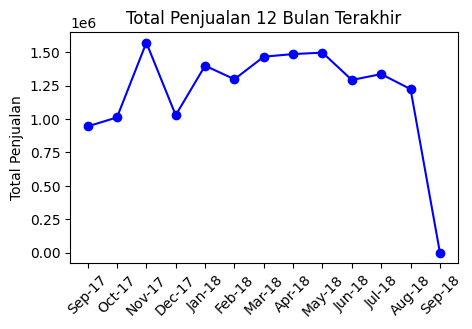

In [410]:
plt.figure(figsize=(5, 3))
plt.plot(monthly_sales_df.index.strftime('%b-%y'), monthly_sales_df.values, marker='o', linestyle='-', color='b')
plt.ylabel('Total Penjualan')
plt.title('Total Penjualan 12 Bulan Terakhir')
plt.xticks(rotation=45) 
plt.show()


In [411]:
# Filter data dengan order_status yang sesuai
Final_df[Final_df['order_status'].isin(['delivered', 'invoiced'])]

# Filter data untuk  6 bulan terakhir
end_date = Final_df['order_purchase_timestamp'].max()
start_date = end_date - pd.DateOffset(months=6)
filtered_data = Final_df[(Final_df['order_purchase_timestamp'] >= start_date) & (Final_df['order_purchase_timestamp'] <= end_date)]

# Hitung jumlah produk yang dipesan oleh setiap pelanggan
product_counts = filtered_data.groupby(['customer_id', 'product_category_name']).size().reset_index(name='count')

product_counts.head()

,customer_id,product_category_name,count
0,000379cdec625522490c315e70c7a9fb,bed_bath_table,1
1,000598caf2ef4117407665ac33275130,pet_shop,1
2,0005aefbb696d34b3424dccd0a0e9fd0,bed_bath_table,1
3,000fd45d6fedae68fc6676036610f879,health_beauty,1
4,001028b78fd413e19704b3867c369d3a,health_beauty,1


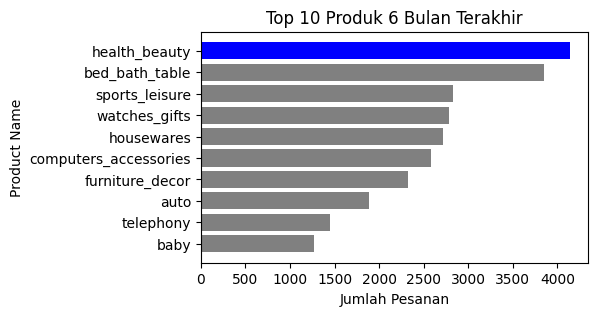

In [412]:
# Visualisasi data 10 produk paling sering dipesan
top_products = product_counts['product_category_name'].value_counts().head(10)
colors = ['blue' if i == 0 else 'gray' for i in range(len(top_products))]

plt.figure(figsize=(5, 3))
plt.barh(top_products.index, top_products.values, color=colors)
plt.xlabel('Jumlah Pesanan')
plt.ylabel('Product Name')
plt.title('Top 10 Produk 6 Bulan Terakhir')
plt.gca().invert_yaxis()
plt.show()

### Berapa persentase pembayaran yang menggunakan metode pembayaran tertentu, dan apakah terdapat perubahan tren dalam penggunaan metode pembayaran selama periode waktu tertentu?

In [413]:
# Memfilter data menjadi satu tahun terakhir
last_year = Final_df['order_purchase_timestamp'].max() - pd.DateOffset(years=1)
last_year_df = Final_df[Final_df['order_purchase_timestamp'] >= last_year]

# Mencari jumlah total transaksi untuk setiap metode pembayaran di tahun terakhir
payment_counts = last_year_df['payment_type'].value_counts()

# Menghitung persentase penggunaan setiap metode pembayaran di tahun terakhir
payment_percentages = (payment_counts / len(last_year_df)) * 100

payment_percentages.head()

payment_type
credit_card    74.403926
boleto         19.123774
voucher         4.830359
debit_card      1.641940
Name: count, dtype: float64

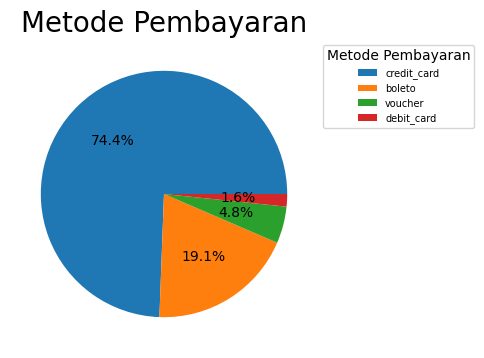

In [414]:
# Membuat visualisasi pie chart untuk persentase penggunaan metode pembayaran
plt.figure(figsize=(4, 4))
plt.pie(payment_percentages, autopct='%1.1f%%')
plt.title('Metode Pembayaran', fontsize=20)
legend = plt.legend(title='Metode Pembayaran', labels=payment_counts.index, bbox_to_anchor=(1, 1), loc='upper left', prop={'size': 7})
plt.setp(legend.get_title(), fontsize=10)
plt.show()

In [415]:
# Menghitung tren penggunaan metode pembayaran selama satu tahun terakhir
payment_trends = last_year_df.groupby([last_year_df['order_purchase_timestamp'].dt.strftime('%Y-%m'), 'payment_type']).size().unstack(fill_value=0)

payment_trends.head()

payment_type,boleto,credit_card,debit_card,voucher
order_purchase_timestamp,,,,
2017-09,985,3409,41,306
2017-10,1166,4008,55,305
2017-11,1763,6697,81,416
2017-12,1307,4795,66,333
2018-01,1732,6170,117,472


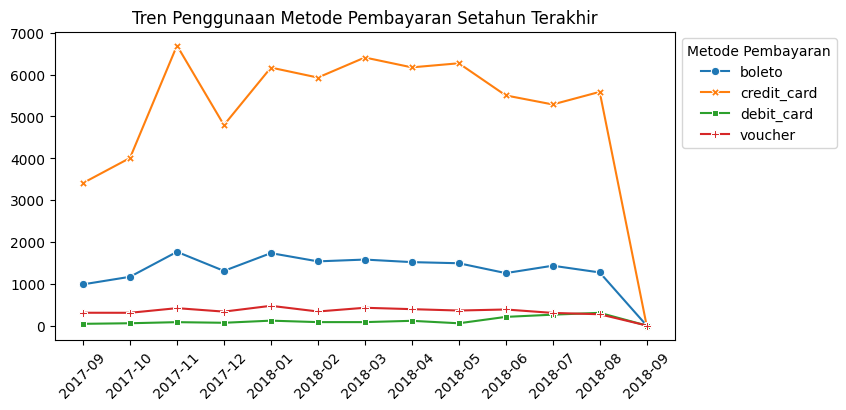

In [416]:
plt.figure(figsize=(8, 4))
sns.lineplot(data=payment_trends, markers=True, dashes=False)
plt.title('Tren Penggunaan Metode Pembayaran Setahun Terakhir')
plt.legend(title='Metode Pembayaran', bbox_to_anchor=(1, 1), loc='upper left', prop={'size': 10})
plt.xticks(rotation=45)
plt.xlabel(None)
plt.show()

### Mengidentifikasi daerah-daerah di mana terdapat peluang bisnis yang belum dimanfaatkan berdasarkan kota pelanggan dan penjual?

In [417]:
# Menghitung jumlah penjual dan pelanggan di setiap kota
seller_counts = Final_df['seller_city'].value_counts()
customer_counts = Final_df['customer_city'].value_counts()

# Menghitung selisih antara jumlah penjual dan pelanggan
city_opportunity = seller_counts - customer_counts

# Membuat DataFrame berdasarkan hasil perhitungan
city_data = pd.DataFrame({
    'City': city_opportunity.index,
    'Opportunity': city_opportunity.values
})

# Menyortir data berdasarkan peluang bisnis
city_data_sorted = city_data.sort_values(by='Opportunity', ascending=False)

city_data_sorted.head()

,City,Opportunity
3648,sao paulo,10457.0
1624,ibitinga,8179.0
3598,sao jose do rio preto,2287.0
3420,santo andre,2192.0
2267,maringa,1934.0


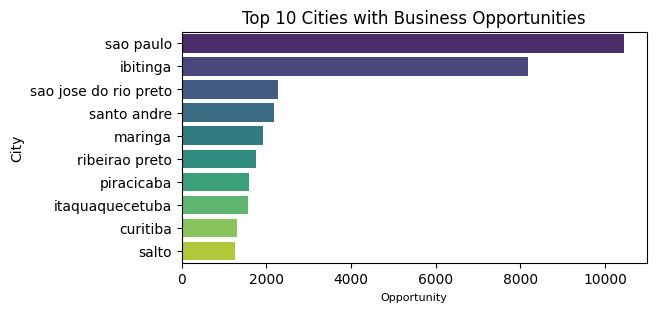

In [418]:
plt.figure(figsize=(6, 3))
sns.barplot(x='Opportunity', y='City', hue='City', data=city_data_sorted.head(10), palette='viridis', legend=False)
plt.xlabel('Opportunity', fontsize=8)
plt.title('Top 10 Cities with Business Opportunities')
plt.show()

### Apakah ada korelasi antara waktu pengiriman dan jumlah ulasan positif yang diterima?

In [419]:
# Menerapkan metode IQR untuk menghilangkan outlier pada kolom delivery_time
Q1 = Final_df['delivery_time'].quantile(0.25)
Q3 = Final_df['delivery_time'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

final_df = Final_df[(Final_df['delivery_time'] >= lower_bound) & (Final_df['delivery_time'] <= upper_bound)]

# Kelompokkan data berdasarkan delivery_time dan hitung rata-rata review_score
average_review_by_delivery_time = final_df.groupby('delivery_time')['review_score'].mean().reset_index()

average_review_by_delivery_time.head()

,delivery_time,review_score
0,0.0,1.745735
1,1.0,4.389860
2,2.0,4.434534
3,3.0,4.351938
4,4.0,4.382193


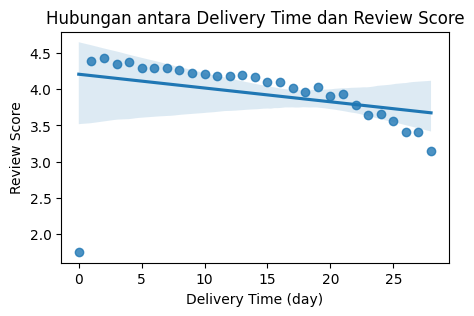

In [420]:
# Buat scatter plot untuk melihat hubungan antara delivery_time dan review_score
plt.figure(figsize=(5, 3))
sns.regplot(x='delivery_time', y='review_score', data=average_review_by_delivery_time)
plt.title('Hubungan antara Delivery Time dan Review Score')
plt.xlabel('Delivery Time (day)')
plt.ylabel('Review Score')
plt.show()

In [421]:
correlation = Final_df['delivery_time'].corr(Final_df['review_score'])
print(f"Korelasi antara delivery_time dan review_score: {correlation}")

Korelasi antara delivery_time dan review_score: -0.23472839776330243


### Apakah terdapat tren musiman dalam penjualan produk tertentu, dan jika ya, apa strategi yang dapat diimplementasikan untuk mengoptimalkan penjualan selama puncak musim tersebut?

In [422]:
# Mengambil data yang relevan
data = Final_df[['order_purchase_timestamp', 'product_category_name', 'order_item_id']]

# Mengelompokkan data berdasarkan bulan dan kategori produk, kemudian menghitung jumlah penjualan
monthly_sales = data.groupby([Final_df['order_purchase_timestamp'].dt.to_period('M'), 'product_category_name'])['order_item_id'].sum().reset_index()

# Mengubah kolom tanggal menjadi tipe datetime
monthly_sales['order_purchase_timestamp'] = pd.to_datetime(monthly_sales['order_purchase_timestamp'].astype(str))

monthly_sales.head()

,order_purchase_timestamp,product_category_name,order_item_id
0,2016-09-01,furniture_decor,3.0
1,2016-09-01,telephony,1.0
2,2016-10-01,air_conditioning,18.0
3,2016-10-01,audio,2.0
4,2016-10-01,auto,13.0


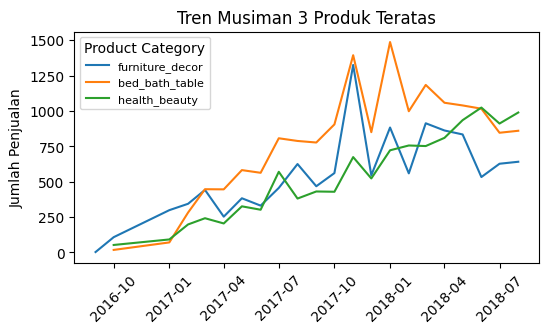

In [423]:
# Menentukan 3 produk teratas berdasarkan penjualan total
top_3_products = monthly_sales.groupby('product_category_name')['order_item_id'].sum().nlargest(3).index

# Memfilter data hanya untuk 3 produk teratas
monthly_sales_top_3 = monthly_sales[monthly_sales['product_category_name'].isin(top_3_products)]

# Membuat plot tren musiman
plt.figure(figsize=(6, 3))
sns.lineplot(x='order_purchase_timestamp', y='order_item_id', hue='product_category_name', data=monthly_sales_top_3)
plt.title('Tren Musiman 3 Produk Teratas')
plt.xlabel(None)
plt.ylabel('Jumlah Penjualan')
plt.xticks(rotation=45)
plt.legend(title='Product Category', loc='upper left', prop={'size': 8})
plt.show()

## Conclusion

### **Conclution 1:** Bagaimana penjualan selama setahun terakhir dan produk apa yang paling sering dipesan oleh pelanggan dalam 6 bulan terakhir?

1. **Tren Penjualan Selama Setahun Terakhir:**
    - Terdapat fluktuasi yang signifikan dalam penjualan selama setahun terakhir. Puncak penjualan terjadi pada November 2017 dengan nilai sekitar 177,5 juta, sementara penjualan merosot drastis pada September 2018, hanya mencapai 2,5 ribu.
    - Perlu dilakukan analisis lebih lanjut untuk memahami faktor-faktor yang mempengaruhi fluktuasi tersebut, seperti musim atau perubahan dalam strategi pemasaran.
2. **Kategori Produk Paling Diminati dalam 6 Bulan Terakhir:**
    - Pelanggan lebih sering membeli produk dalam kategori Health & Beauty, yang mencatat total pesanan sebanyak 4.126 kali dalam 6 bulan terakhir.
    - Selain itu, kategori-kategori seperti Bed & Bath Table, Sports & Leisure, Watches & Gifts, dan Housewares juga mendapatkan perhatian tinggi dari pelanggan dengan jumlah pesanan yang signifikan.
3. **Implikasi Bisnis:**
    - Informasi ini dapat membantu bisnis untuk mengatur stok dan strategi pemasaran dengan lebih efektif. Produk dalam kategori-kategori yang paling diminati dapat diberikan fokus lebih besar.
    = Analisis lebih lanjut dapat membantu dalam memahami alasan di balik fluktuasi penjualan selama setahun terakhir, sehingga bisnis dapat mengambil langkah-langkah yang tepat untuk mengatasi perubahan tren.

### **Conclution 2:** Berapa persentase pembayaran yang menggunakan metode pembayaran tertentu, dan apakah terdapat perubahan tren dalam penggunaan metode pembayaran selama periode waktu tertentu?

1. **Persentase Penggunaan Metode Pembayaran:**
    - Metode pembayaran yang paling umum digunakan adalah credit card dengan persentase sebesar 74.1% dari total pembayaran.
    - Metode pembayaran boleto digunakan sebanyak 19.4% dari total pembayaran.
    - Penggunaan metode pembayaran voucher adalah sekitar 4.9% dari total pembayaran.
    - Sedangkan, metode pembayaran debit card memiliki persentase yang lebih kecil, yaitu sekitar 1.6% dari total pembayaran.
2. **Tren Penggunaan Metode Pembayaran:**
    - Data tren penggunaan metode pembayaran selama beberapa bulan menunjukkan perubahan signifikan dalam preferensi pembayaran pelanggan.
    - Penggunaan credit card cenderung meningkat sepanjang waktu, menunjukkan bahwa lebih banyak pelanggan memilih opsi ini sebagai metode pembayaran.
    - Penggunaan boleto juga mengalami peningkatan yang signifikan selama periode tersebut.
    - Penggunaan debit card dan voucher tampaknya lebih stabil, meskipun jumlah penggunaan debit card sedikit meningkat.
3. **Insight Tambahan:**
    - Perubahan tren penggunaan metode pembayaran dapat mempengaruhi strategi bisnis e-commerce. Misalnya, meningkatnya penggunaan credit card dapat mengindikasikan kepercayaan pelanggan yang lebih besar terhadap platform.
    - Penting untuk terus memantau tren penggunaan metode pembayaran untuk mengambil keputusan yang lebih baik terkait manajemen risiko dan strategi pemasaran.
    - Mungkin ada peluang untuk mempromosikan atau memberikan insentif khusus untuk penggunaan metode pembayaran tertentu guna mendorong pelanggan untuk memilih metode pembayaran yang diinginkan oleh e-commerce Anda.

### **Conclution 3:** Mengidentifikasi daerah-daerah di mana terdapat peluang bisnis yang belum dimanfaatkan berdasarkan kota pelanggan dan penjual?

Analisis data geolokasi pelanggan dan penjual dalam dataset e-commerce telah memberikan pandangan yang menarik tentang peluang bisnis yang belum dimanfaatkan di beberapa daerah. Dari tabel yang disajikan, kita dapat menyimpulkan beberapa poin yang sangat berarti:

1. **Konsentrasi Peluang Bisnis:** Terdapat sejumlah kota yang menonjol dengan peluang bisnis yang signifikan, seperti São Paulo, Ibitinga, Sao Jose do Rio Preto, Maringá, dan lainnya. Hal ini menunjukkan bahwa dalam pengembangan bisnis e-commerce, penting untuk fokus pada daerah-daerah ini yang memiliki potensi pasar yang besar.
2. **Potensi Ekspansi:** Kota-kota dengan peluang bisnis besar, seperti yang terlihat dari angka "Opportunity" dalam tabel, mungkin belum sepenuhnya dimanfaatkan oleh penjual atau perusahaan e-commerce. Ini menciptakan peluang besar untuk ekspansi bisnis ke daerah-daerah tersebut, baik dengan meningkatkan pemasaran, penawaran produk, atau layanan pengiriman.
3. **Optimasi Layanan:** Data geolokasi juga memberikan pandangan yang berharga tentang di mana pelanggan berada. Dengan memahami lokasi pelanggan, perusahaan dapat mengoptimalkan layanan pengiriman, stok barang, dan strategi pemasaran. Ini dapat membantu meningkatkan kepuasan pelanggan dan efisiensi operasional.
4. **Keputusan Strategis:** Informasi ini dapat digunakan untuk pengambilan keputusan strategis, termasuk alokasi sumber daya, pembukaan pusat distribusi baru, atau bahkan kemitraan dengan penjual lokal untuk mencapai potensi bisnis yang lebih besar.

Dengan demikian, analisis data geolokasi dalam konteks bisnis e-commerce bukan hanya memberikan wawasan tentang "di mana" peluang bisnis terletak, tetapi juga mengarah pada tindakan yang dapat diambil untuk memanfaatkan potensi tersebut. Ini adalah contoh konkret bagaimana data dapat menjadi alat strategis yang kuat dalam pengembangan bisnis.

### **Conclution 4:** Apakah ada korelasi antara waktu pengiriman dan jumlah ulasan positif yang diterima?

Dari analisis korelasi antara waktu pengiriman (delivery_time) dan jumlah ulasan positif yang diterima (review_score), ditemukan bahwa korelasi antara keduanya adalah sekitar -0.23784. Korelasi ini memiliki nilai negatif, yang menunjukkan adanya hubungan negatif antara waktu pengiriman dan jumlah ulasan positif.

Kesimpulan yang dapat diambil dari ini adalah sebagai berikut:

1. **Pengiriman Lebih Cepat Cenderung Meningkatkan Ulasan Positif:** Korelasi negatif menunjukkan bahwa ketika produk atau pesanan dikirim lebih cepat kepada pelanggan, kemungkinan pelanggan memberikan ulasan positif lebih tinggi. Ini bisa disebabkan oleh kepuasan pelanggan terhadap pengiriman yang cepat dan efisien.
2. **Lama Pengiriman Dapat Mengurangi Kepuasan Pelanggan:** Sebaliknya, waktu pengiriman yang lebih lama dapat mengurangi kepuasan pelanggan dan menyebabkan ulasan negatif. Pelanggan mungkin menjadi tidak puas jika pesanan mereka mengalami keterlambatan dalam pengiriman.
3. **Pentingnya Manajemen Waktu Pengiriman:** Data ini menyoroti pentingnya manajemen waktu pengiriman yang efisien dalam e-commerce. Perusahaan e-commerce dapat memperbaiki ulasan pelanggan dan reputasi mereka dengan meningkatkan efisiensi dalam proses pengiriman.
4. **Perlu Dilakukan Analisis Lebih Lanjut:** Meskipun korelasi menunjukkan hubungan antara waktu pengiriman dan ulasan positif, analisis lebih lanjut mungkin diperlukan untuk memahami faktor-faktor lain yang memengaruhi ulasan pelanggan, seperti kualitas produk dan layanan pelanggan.

Dengan memahami hubungan ini, perusahaan e-commerce dapat berupaya untuk meningkatkan pengalaman pelanggan dengan mengelola waktu pengiriman dengan lebih baik dan meningkatkan kesan positif pelanggan terhadap bisnis mereka.

### **Conclution 5:** Apakah terdapat tren musiman dalam penjualan produk tertentu, dan jika ya, apa strategi yang dapat diimplementasikan untuk mengoptimalkan penjualan selama puncak musim tersebut?

Dari data tren musiman penjualan tiga kategori produk teratas (bed_bath_table, furniture_decor, health_beauty) selama beberapa bulan, dapat ditarik beberapa kesimpulan yang dapat membantu dalam merancang strategi untuk mengoptimalkan penjualan selama puncak musim:

1. **Tren Musiman Terlihat pada Kategori Produk:** Dalam data yang diberikan, terlihat jelas bahwa ada tren musiman dalam penjualan produk tertentu. Misalnya, dalam kategori "furniture_decor," penjualan cenderung meningkat tajam selama bulan-bulan tertentu seperti Oktober, Januari, dan November pada tahun-tahun tertentu. Ini mungkin berkaitan dengan musim liburan dan perayaan tertentu yang mendorong peningkatan permintaan untuk produk-produk dekorasi.
2. **Mengoptimalkan Persediaan:** Berdasarkan tren musiman ini, strategi yang dapat diimplementasikan adalah mengoptimalkan persediaan. Selama puncak musim, perusahaan harus memastikan bahwa mereka memiliki persediaan yang cukup untuk memenuhi permintaan yang meningkat. Sebaliknya, selama periode yang lebih sepi, mereka dapat mengurangi persediaan atau fokus pada promosi produk lain.
3. **Penawaran Khusus dan Promosi:** Selama puncak musim, perusahaan dapat menawarkan promosi khusus atau diskon untuk menarik pelanggan. Ini dapat membantu meningkatkan penjualan lebih lanjut. Misalnya, pada bulan-bulan dengan penjualan tinggi seperti November, penawaran liburan dapat menjadi strategi yang efektif.
4. **Analisis Data Historis:** Selain itu, perusahaan dapat melakukan analisis lebih mendalam terhadap data historis untuk memahami pola dan tren lebih baik. Mereka dapat menggunakan data ini untuk merencanakan kampanye pemasaran yang sesuai dengan musim.
5. **Kolaborasi dengan Pemasok:** Jika peningkatan permintaan selama puncak musim terkait dengan ketersediaan produk, perusahaan dapat bekerja sama dengan pemasok untuk memastikan pasokan yang memadai selama periode tersebut.
6. **Evaluasi Kinerja:** Setelah musim berlalu, perusahaan harus melakukan evaluasi kinerja untuk memahami sejauh mana strategi yang diimplementasikan berhasil dan apa yang dapat ditingkatkan untuk musim berikutnya.

Dengan memahami tren musiman dan merancang strategi yang tepat, perusahaan dapat mengoptimalkan penjualan dan meningkatkan kinerja mereka selama periode puncak musim.